In [43]:
import pandas as pd 
import xgboost as x
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
tr=pd.read_csv(r"pdata\train.csv",index_col="PassengerId")
tr=pd.DataFrame(tr)

In [45]:
tr=tr.drop(["Cabin","Ticket","Name"],axis=1)

In [46]:
tr["Age"]=tr["Age"].fillna(tr["Age"].mean())
tr["Embarked"]=tr["Embarked"].fillna(tr["Embarked"].mode)


In [47]:
tr.isnull().sum()
tr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [48]:
tr["Embarked"].value_counts()


S                                                                                                                                                                                                      644
C                                                                                                                                                                                                      168
Q                                                                                                                                                                                                       77
<bound method Series.mode of PassengerId\n1      S\n2      C\n3      S\n4      S\n5      S\n      ..\n887    S\n888    S\n889    S\n890    C\n891    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: Embarked, dtype: int64

In [49]:
tr=pd.get_dummies(tr)
tr.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,"Embarked_<bound method Series.mode of PassengerId\n1 S\n2 C\n3 S\n4 S\n5 S\n ..\n887 S\n888 S\n889 S\n890 C\n891 Q\nName: Embarked, Length: 891, dtype: object>",Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [50]:
tr = tr.drop(tr.columns[8], axis=1)


In [51]:
y=tr["Survived"]
tr=tr.drop("Survived",axis=1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
regressor = x.XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.2, random_state=42)


In [53]:
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.19553072625698323


In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


<AxesSubplot:>

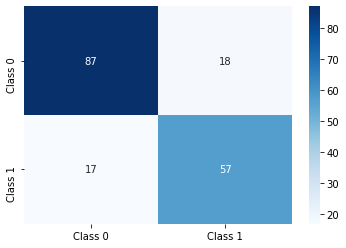

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib as plt
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Class 0', 'Class 1']
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


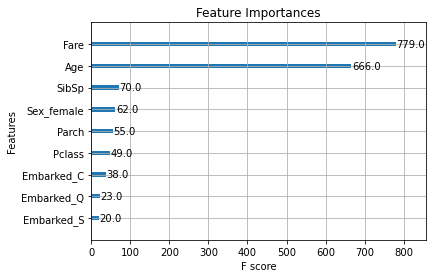

In [65]:
# Plot feature importances
import matplotlib.pyplot as plt
x.plot_importance(regressor)
plt.title('Feature Importances')
plt.show()

In [66]:
x=regressor.predict_proba(tr)
x

array([[0.9555051 , 0.0444949 ],
       [0.00123978, 0.9987602 ],
       [0.2588768 , 0.7411232 ],
       ...,
       [0.98799485, 0.01200513],
       [0.0237394 , 0.9762606 ],
       [0.919181  , 0.08081903]], dtype=float32)

In [67]:
num_trees = regressor.best_iteration
# Print the number of trees
print(f"Number of trees: {num_trees}")

Number of trees: 99


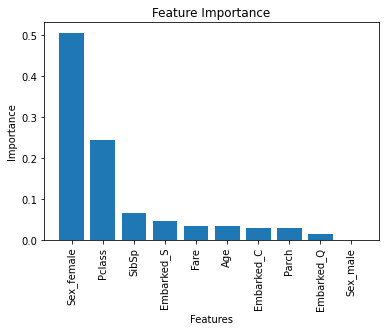

In [68]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have trained an XGBoost model called 'regressor'
# and have a feature_names list with the names of your features
feature_names=X_test.columns
# Retrieve the feature importance levels
importance = regressor.feature_importances_

# Create a sorted list of feature names and their corresponding importance levels
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

# Separate the feature names and importance levels into separate lists
sorted_names, sorted_importance = zip(*feature_importance)

# Plot the feature importance levels
plt.bar(sorted_names, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()
